# Airbnb Data Set Analysis


### Data understanding
The data is taken from Airbnb for 1 city (Barcelona).

-List : Contains the description of review and ratings.

-Reviews: contains ID for reviewer and comments

### Finding overall rating of service and popular review words

#### Import & Overview of dataset

In [1]:
#Standard libraries
import pandas as pd 
#Load Dataset
listing = pd.read_csv("listings 2.csv") 
reviews = pd.read_csv("reviews 2.csv") 

In [2]:
#Look at the first rows from Listings and Review dataset
display(listing.head(3),reviews.head(3))

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,673276379194656210,https://www.airbnb.com/rooms/673276379194656210,20220910194401,2022-09-10,city scrape,Habitación muy acogedora.,Abrace la simplicidad en este lugar tranquilo ...,El barrio es tranquilo y bien hubicado. Cerc...,https://a0.muscache.com/pictures/miso/Hosting-...,51421682,...,4.89,4.89,4.78,Exempt,t,1,0,1,0,9.00
1,44192271,https://www.airbnb.com/rooms/44192271,20220910194401,2022-09-10,city scrape,Cozy terrace apartment Apartamento con patio,A private terraced + 2 bedroom ground floor ap...,The neighbourhood is quiet with trees. Though ...,https://a0.muscache.com/pictures/2e579e6b-b717...,200754964,...,4.98,4.52,4.65,HUTB-013294,f,1,1,0,0,2.45
2,17039441,https://www.airbnb.com/rooms/17039441,20220910194401,2022-09-10,city scrape,Apart. full equipped. 2 min to Subway lines L1...,Precioso apartamento ideal para parejas. Lumin...,La zona dispone de servicios básicos y una exc...,https://a0.muscache.com/pictures/02af8b09-c8ca...,114340651,...,4.99,4.70,4.89,NaN,f,1,1,0,0,2.15


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,673276379194656210,691141672749367564,2022-08-11,271989411,Marlene,María Das Merces es muy linda agradable te ayu...
1,196021,578491,2011-09-28,1111424,Zara,Excellent (Website hidden by Airbnb) location ...
2,196021,622897,2011-10-12,1094982,Anne,We had a wonderful stay. The flat is central t...


In [4]:
#Label each area (for adding other cities later)
listing['area'] = 'barcelona'
reviews['area'] = 'barcelona'

In [5]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
listing.groupby('area')["review_scores_rating"].describe().transpose()

area,barcelona
count,13306.000000
mean,4.526059
std,0.644020
min,0.000000
25%,4.400000
50%,4.670000
75%,4.890000
max,5.000000


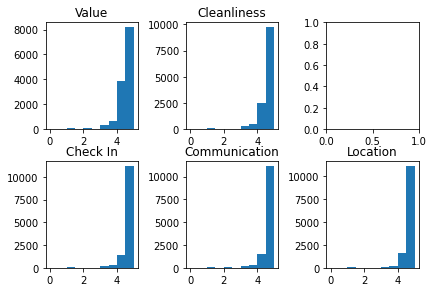

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

ax[0, 0].hist(listing["review_scores_value"]) #row=0, col=0
ax[0, 0].set_title('Value')
ax[1, 0].hist(listing["review_scores_checkin"]) #row=1, col=0
ax[1, 0].set_title('Check In')
ax[0, 1].hist(listing["review_scores_cleanliness"]) #row=0, col=1
ax[0, 1].set_title('Cleanliness')
ax[1, 1].hist(listing["review_scores_communication"]) #row=1, col=1
ax[1, 1].set_title('Communication')
ax[1, 2].hist(listing["review_scores_location"]) #row=1, col=2
ax[1 ,2].set_title('Location')
plt.show()

#### Filling Missing Reviews as Blank
Using Missing Value Treatment (MVT)

In [8]:
#count missing values
reviews['comments'].isnull().sum()

46

In [9]:
import itertools
import collections

def convert(lst): 
    return ([i for item in lst for i in item.lower().split()]) 

all_words_review = convert(reviews['comments'].fillna("")) #Fill in missing reviews with blank

#### Word Frequency

In [61]:
count_word = collections.Counter(all_words_review) #Count word frequency

clean_word_count = pd.DataFrame(count_word.most_common(5),
                             columns=['words', 'count'])

clean_word_count.head()

,words,count
0,the,1188800
1,and,1030068
2,a,740963
3,to,633948
4,was,491563


#### Removing Stopwords

In [62]:
import nltk
from nltk.corpus import stopwords

In [63]:
stop_words = set(stopwords.words(['spanish','english']))

# View a few words from the set
list(stop_words)[0:10]

['estuvieron',
 "needn't",
 'sois',
 'todo',
 'erais',
 'tendrá',
 'having',
 'habremos',
 'hubieseis',
 'fuese']

In [64]:
words_review_cleaned = [word for word in all_words_review if word not in stop_words] 
words_review_count = collections.Counter(words_review_cleaned)

word_review_count_df = pd.DataFrame(words_review_count.most_common(15),
                             columns=['words', 'count'])

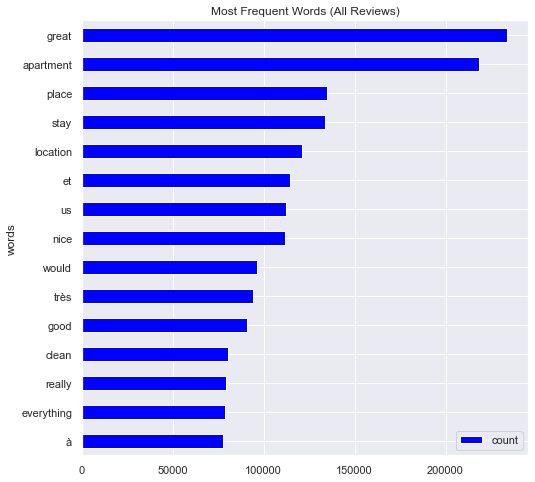

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_review_count_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Most Frequent Words (All Reviews)")

plt.show()